#**DIGITAL IMAGE PROCESSING - LAB 2**

In [1]:
#import libraries
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import skimage.io

list_path = 'C:\\Users\\lara2\\OneDrive\\Documentos\\UFES\\PDI\\Lab02\\'

#Question 1: Visualize the Fourier spectrum of the image Fig10.10(a).jpg. Compare the results: 

##a) Can you see anything useful in this visualization?

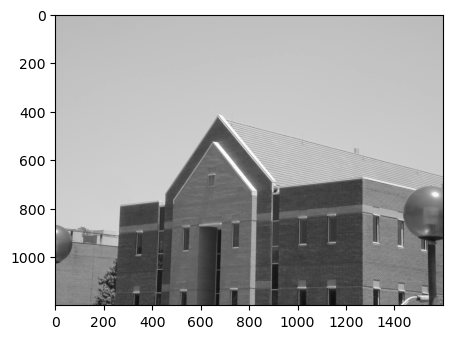

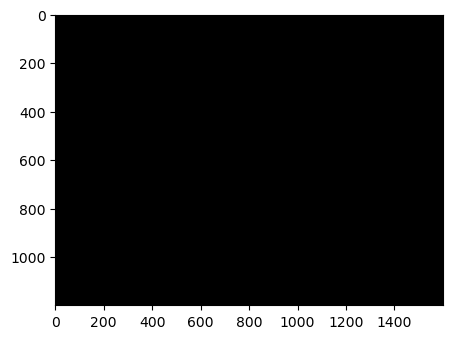

298379459.0


In [2]:
im = skimage.io.imread(list_path+'Fig10.10(a).jpg')
plt.figure(figsize = (5,5))
plt.imshow(im,cmap='gray',vmin=0,vmax=255)
plt.show()
F = (np.fft.fft2(im))
plt.figure(figsize = (5,5))
plt.imshow(np.abs(F),cmap='gray')
#plt.imshow(np.abs(F),cmap='gray',vmin=0,vmax=255)
plt.show()
print(np.max(np.abs(F)))

##b) And in this one?

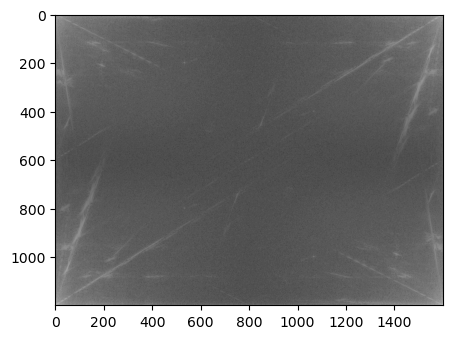

In [3]:
F_show = np.log(np.abs(F)+1)
F_show = 255*(F_show - np.min(F_show))/(np.max(F_show) - np.min(F_show))

plt.figure(figsize = (5,5)) 
plt.imshow(F_show,cmap='gray') 
#plt.imshow(F_show,cmap='gray',vmin=0,vmax=255) 
plt.show()

##c) What do you notice in this visualization compared to the previous one? What is the np.fft.fftshift command doing? Can you relate any spectral information to the image? Which?

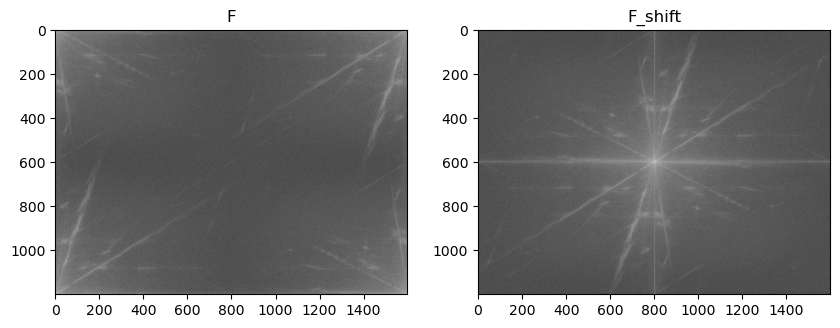

In [4]:
F_shift = np.fft.fftshift(F)

F_shift_show = np.log(np.abs(F_shift)+1)
F_shift_show = 255*(F_shift_show - np.min(F_shift_show))/(np.max(F_shift_show) - np.min(F_shift_show))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axs[0].imshow(np.log(np.abs(F)+1),cmap='gray')
axs[1].imshow(np.log(np.abs(F_shift)+1),cmap='gray')
axs[0].set_title('F')
axs[1].set_title('F_shift');

#Question 2: Perform a low-pass filter on the image Fig10.10(a).jpg. Using an ideal, Butterworth, and Gaussian filter of radius 100. Compare filter results. Also apply high-pass filters letting pass the frequency 0 (remember that a $H_{hp} = 1 – H_{lp}$). Use the commands vmin=0 and vmax=255 in imshow to see the effect.

Text(0.5, 1.0, 'Gaussian')

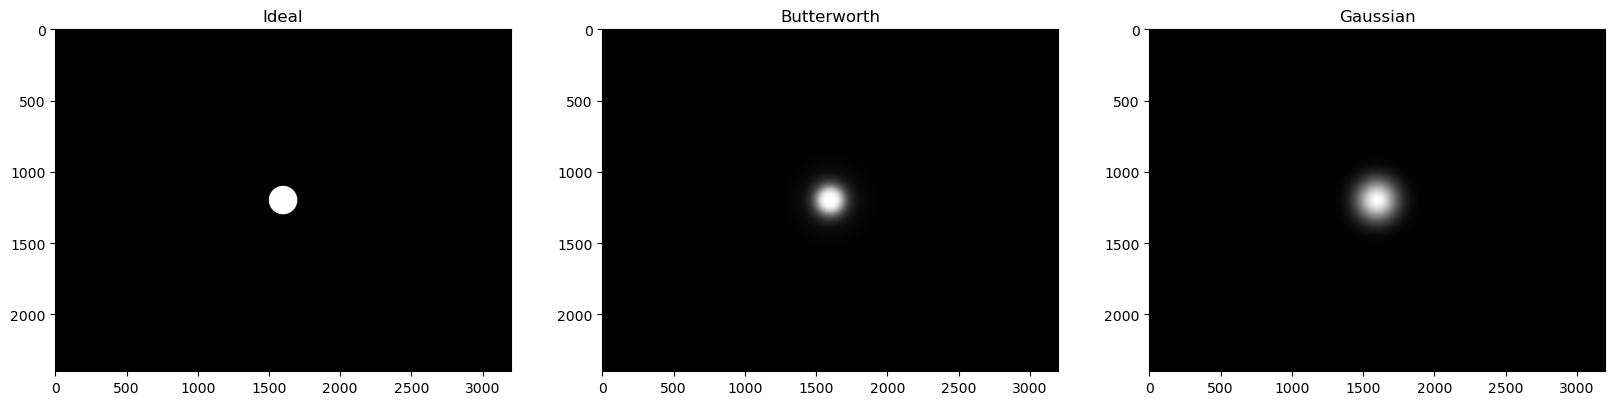

In [6]:
im2 = skimage.io.imread(list_path+'Fig10.10(a).jpg') 
im_fill = np.zeros((2*im2.shape[0],2*im2.shape[1])) 
im_fill[0:im2.shape[0],0:im2.shape[1]] = im2 
F_shift = np.fft.fftshift(np.fft.fft2(im_fill)) 

y = np.arange(-im2.shape[0], im2.shape[0], 1)
x = np.arange(-im2.shape[1], im2.shape[1], 1)
u, v = np.meshgrid(x, y)
#print(y)
#print(x)
#print(u)
#print(v)
D = np.sqrt(u**2 + v**2)
D0 = 100

#Ideal filter 
H_ideal = np.zeros((2*im2.shape[0],2*im2.shape[1])) 
H_ideal[D <= D0] = 1 

#Butterworth filter (order 2) 
n = 2 
H_but = np.zeros((2*im2.shape[0],2*im2.shape[1])) 
H_but = 1/(1+(D/D0)**(2*n)) 

#Gaussian filter
H_gauss = np.exp(-(D**2)/(2*(D0**2))) 

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 20)) 
axs[0].imshow(H_ideal,cmap='gray') 
axs[1].imshow(H_but,cmap='gray') 
axs[2].imshow(H_gauss,cmap='gray') 
axs[0].set_title('Ideal') 
axs[1].set_title('Butterworth') 
axs[2].set_title('Gaussian')

Text(0.5, 1.0, 'Gaussian')

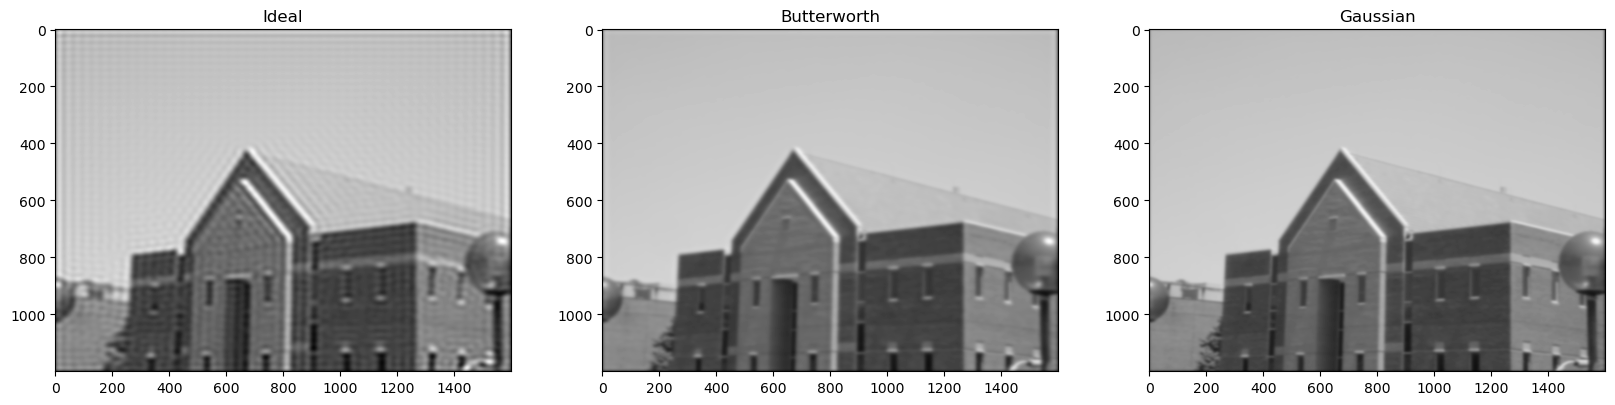

In [7]:
#Ideal filtering
G_ideal = F_shift*H_ideal 
im_ideal_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_ideal))) 
im_ideal = im_ideal_fill[0:im2.shape[0],0:im2.shape[1]] 

#Butterworth filtering 
G_but = F_shift*H_but 
im_but_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_but))) 
im_but = im_but_fill[0:im2.shape[0],0:im2.shape[1]] 

#Gaussian filtering 
G_gauss = F_shift*H_gauss 
im_gauss_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_gauss))) 
im_gauss = im_gauss_fill[0:im2.shape[0],0:im2.shape[1]] 

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 20)) 
axs[0].imshow(im_ideal,cmap='gray',vmin=0,vmax=255) 
axs[1].imshow(im_but,cmap='gray',vmin=0,vmax=255) 
axs[2].imshow(im_gauss,cmap='gray',vmin=0,vmax=255) 
axs[0].set_title('Ideal') 
axs[1].set_title('Butterworth') 
axs[2].set_title('Gaussian')

Text(0.5, 1.0, 'Gaussian')

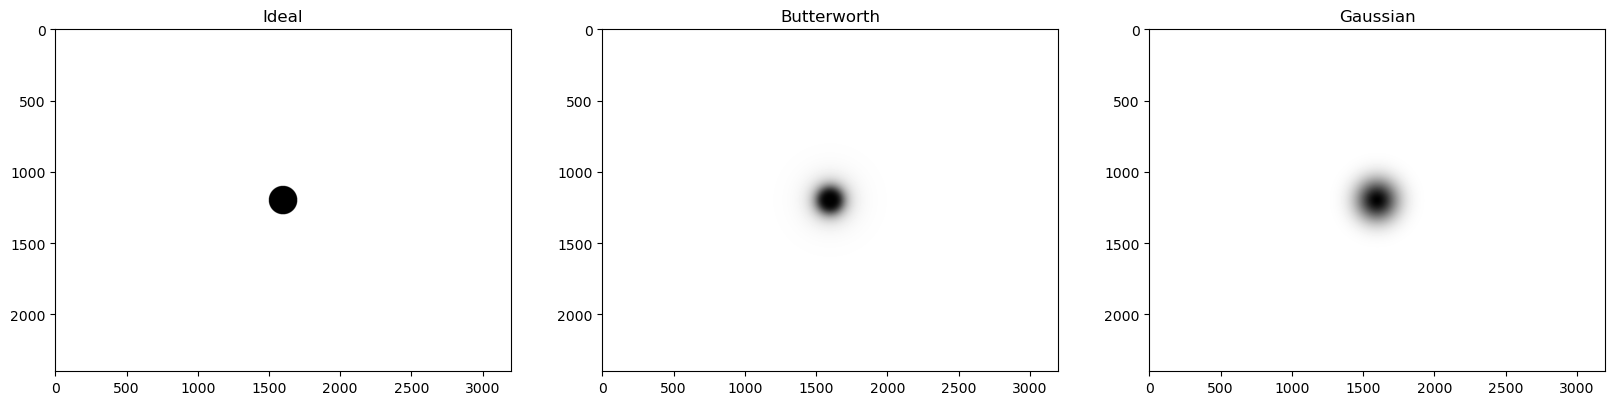

In [8]:
#Ideal filter 
H_ideal = np.zeros((2*im2.shape[0],2*im2.shape[1])) 
H_ideal[D <= D0] = 1 
H_ideal = 1 - H_ideal

#Butterworth filter (order 2) 
n = 2 
H_but = np.zeros((2*im2.shape[0],2*im2.shape[1])) 
H_but = 1/(1+(D/D0)**(2*n)) 
H_but = 1 - H_but

#Gaussian filter
H_gauss = np.exp(-(D**2)/(2*(D0**2))) 
H_gauss = 1 - H_gauss

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 20)) 
axs[0].imshow(H_ideal,cmap='gray') 
axs[1].imshow(H_but,cmap='gray') 
axs[2].imshow(H_gauss,cmap='gray') 
axs[0].set_title('Ideal') 
axs[1].set_title('Butterworth') 
axs[2].set_title('Gaussian')

Text(0.5, 1.0, 'Gaussian')

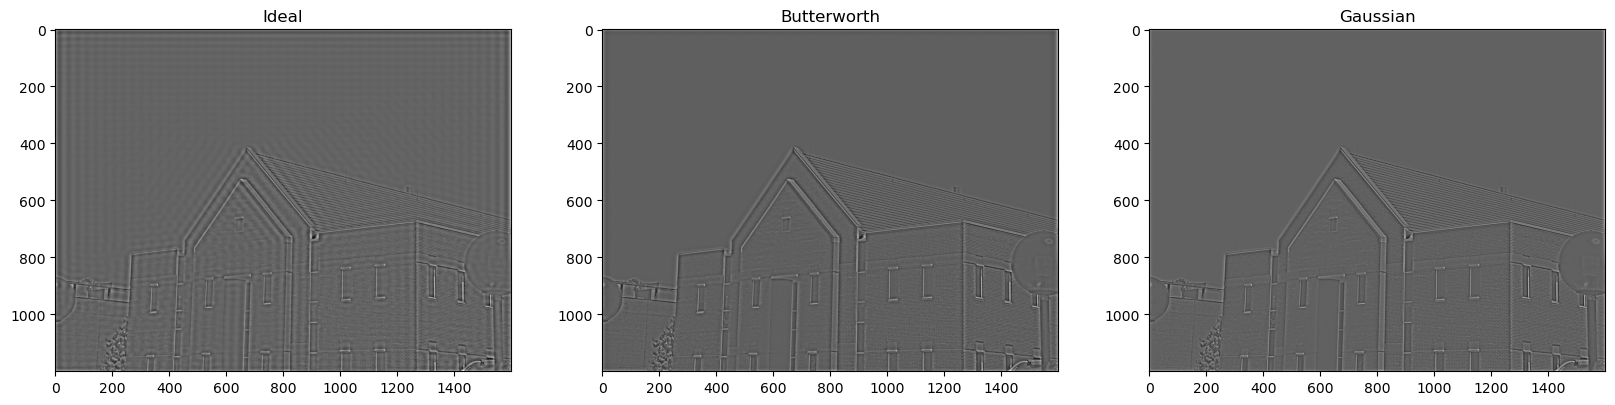

In [9]:
#Ideal filtering
G_ideal = F_shift*H_ideal 
im_ideal_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_ideal))) 
im_ideal = im_ideal_fill[0:im2.shape[0],0:im2.shape[1]] 

#Butterworth filtering 
G_but = F_shift*H_but 
im_but_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_but))) 
im_but = im_but_fill[0:im2.shape[0],0:im2.shape[1]] 

#Gaussian filtering 
G_gauss = F_shift*H_gauss 
im_gauss_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_gauss))) 
im_gauss = im_gauss_fill[0:im2.shape[0],0:im2.shape[1]] 

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 20)) 
axs[0].imshow(im_ideal,cmap='gray')#,vmin=0,vmax=255) 
axs[1].imshow(im_but,cmap='gray')#,vmin=0,vmax=255) 
axs[2].imshow(im_gauss,cmap='gray')#,vmin=0,vmax=255) 
axs[0].set_title('Ideal') 
axs[1].set_title('Butterworth') 
axs[2].set_title('Gaussian')

#Question 3: Apply low-pass filters on the image Fig4.19(a).jpg and analyze the results

Text(0.5, 1.0, 'Gaussian')

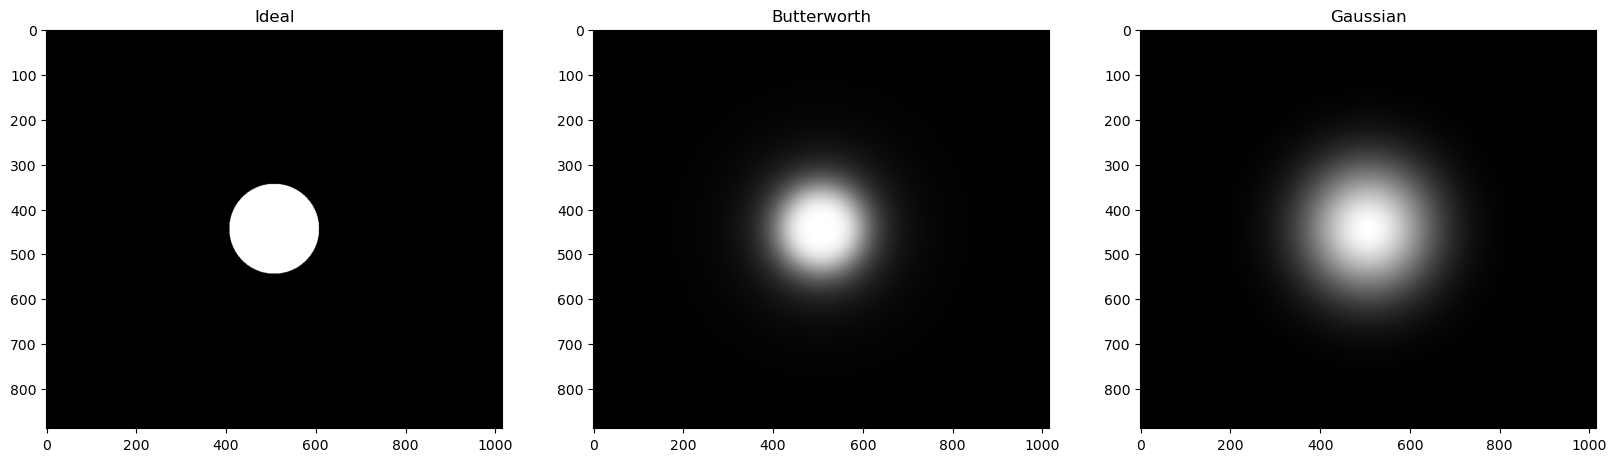

In [10]:
im2 = skimage.io.imread(list_path+'Fig4.19(a).jpg') 
im_fill = np.zeros((2*im2.shape[0],2*im2.shape[1])) 
im_fill[0:im2.shape[0],0:im2.shape[1]] = im2 
F_shift = np.fft.fftshift(np.fft.fft2(im_fill)) 

y = np.arange(-im2.shape[0], im2.shape[0], 1)
x = np.arange(-im2.shape[1], im2.shape[1], 1) 
u, v = np.meshgrid(x, y) 

D = np.sqrt(u**2 + v**2) 
D0 = 100
 
#Ideal filter 
H_ideal = np.zeros((2*im2.shape[0],2*im2.shape[1])) 
H_ideal[D <= D0] = 1 

#Butterworth filter (order 2) 
n = 2 
H_but = np.zeros((2*im2.shape[0],2*im2.shape[1])) 
H_but = 1/(1+(D/D0)**(2*n)) 

#Gaussian filter
H_gauss = np.exp(-(D**2)/(2*(D0**2))) 

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 20)) 
axs[0].imshow(H_ideal,cmap='gray') 
axs[1].imshow(H_but,cmap='gray') 
axs[2].imshow(H_gauss,cmap='gray') 
axs[0].set_title('Ideal') 
axs[1].set_title('Butterworth') 
axs[2].set_title('Gaussian')

Text(0.5, 1.0, 'Gaussian')

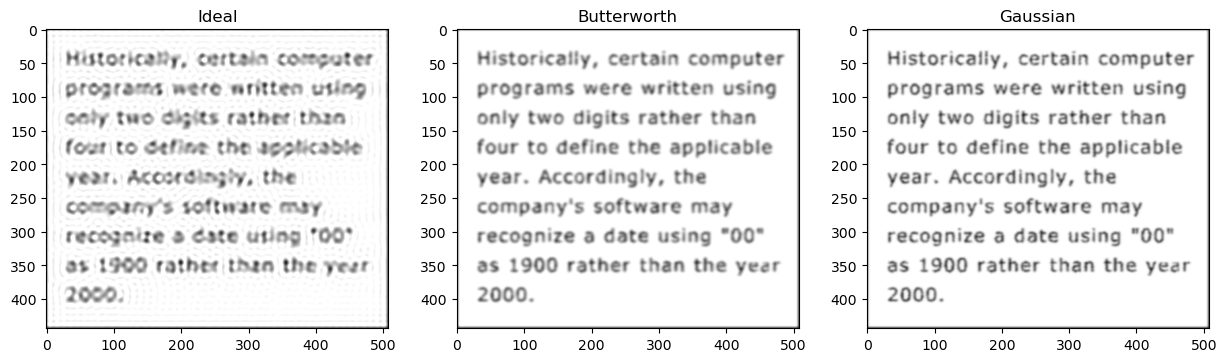

In [11]:
#Ideal filtering
G_ideal = F_shift*H_ideal 
im_ideal_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_ideal))) 
im_ideal = im_ideal_fill[0:im2.shape[0],0:im2.shape[1]] 

#Butterworth filtering 
G_but = F_shift*H_but 
im_but_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_but))) 
im_but = im_but_fill[0:im2.shape[0],0:im2.shape[1]] 

#Gaussian filtering 
G_gauss = F_shift*H_gauss 
im_gauss_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_gauss))) 
im_gauss = im_gauss_fill[0:im2.shape[0],0:im2.shape[1]] 

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) 
axs[0].imshow(im_ideal,cmap='gray',vmin=0,vmax=255) 
axs[1].imshow(im_but,cmap='gray',vmin=0,vmax=255) 
axs[2].imshow(im_gauss,cmap='gray',vmin=0,vmax=255) 
axs[0].set_title('Ideal') 
axs[1].set_title('Butterworth') 
axs[2].set_title('Gaussian')

#Question 4: Apply a homomorphic filter to homo1.jpg and homo2.png images, according to the equation and steps below. Some values that can be used (try using others): $c=1$, $D_0=30$, $γ_H=1$, and $γ_L=0.85$. Convert the image data type to floating point before calculating the logarithm. Use histogram equalization to increase contrast.

\begin{equation}
\large
H(u,v) = (γ_H - γ_L)[1 - e^{-c[D(u,v)^2/D_0^2]}] + γ_L
\end{equation}


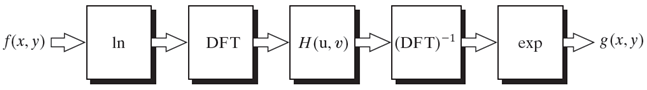

In [ ]:

#histogram equalization
from skimage import exposure
im = 255*skimage.exposure.equalize_hist(np.double(im))



Text(0.5, 1.0, 'Homomorphic')

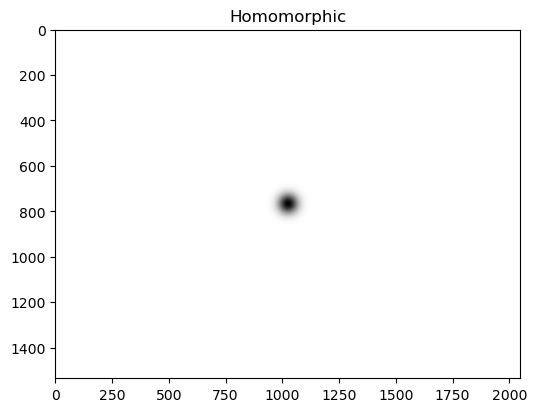

In [12]:
#im1 = skimage.io.imread(list_path+'homo2.png')
im1 = skimage.io.imread(list_path+'homo1.jpg')
im1 = np.double(im1)
im = np.log(im1 + 1)

im_fill = np.zeros((2*im.shape[0],2*im.shape[1]))
im_fill[0:im.shape[0],0:im.shape[1]] = im

F_shift = np.fft.fftshift(np.fft.fft2(im_fill)) 

y = np.arange(-im.shape[0], im.shape[0], 1)
x = np.arange(-im.shape[1], im.shape[1], 1) 
u, v = np.meshgrid(x, y) 

D = np.sqrt(u**2 + v**2)
c = 1
D0 = 30
gama_h = 1
gama_l = 0.85

H_gauss = np.exp(-c*(D**2)/(2*(D0**2))) 
H_homo = (gama_h - gama_l)*(1 - H_gauss)+gama_h

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6)) 
axs.imshow(H_homo,cmap='gray')
axs.set_title('Homomorphic')

Text(0.5, 1.0, 'Filteres Img')

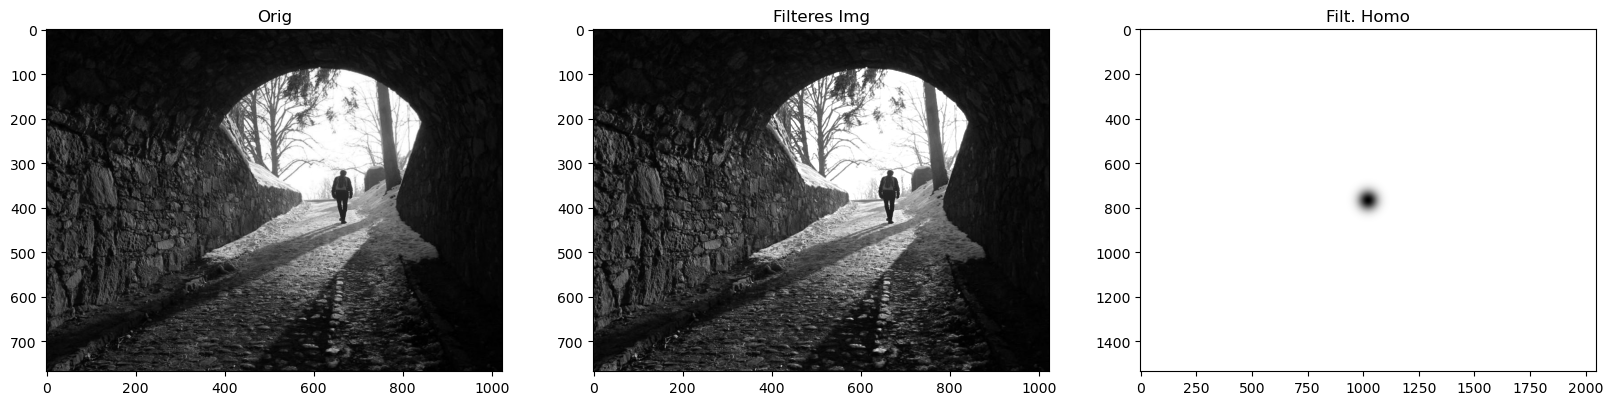

In [13]:
G_homo = F_shift*H_homo
im_homo_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_homo))) 
im_homo = im_homo_fill[0:im.shape[0],0:im.shape[1]] 

im_homo = np.exp(im_homo)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 20)) 
axs[0].imshow(im1,cmap='gray',vmin=0,vmax=255) 
axs[2].imshow(H_homo,cmap='gray')
axs[1].imshow(im_homo,cmap='gray',vmin=0,vmax=255) 
axs[0].set_title('Orig') 
axs[2].set_title('Filt. Homo') 
axs[1].set_title('Filteres Img')

Text(0.5, 1.0, 'Homomorphic')

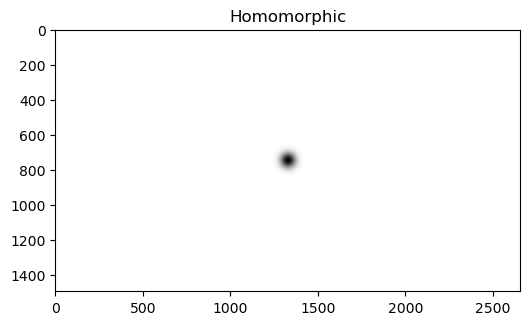

In [15]:
im1 = skimage.io.imread(list_path+'homo2.png')
im1 = np.double(im1)
im = np.log(im1 + 1)

im_fill = np.zeros((2*im.shape[0],2*im.shape[1]))
im_fill[0:im.shape[0],0:im.shape[1]] = im

F_shift = np.fft.fftshift(np.fft.fft2(im_fill)) 

y = np.arange(-im.shape[0], im.shape[0], 1)
x = np.arange(-im.shape[1], im.shape[1], 1) 
u, v = np.meshgrid(x, y) 

D = np.sqrt(u**2 + v**2)
c = 1
D0 = 30
gama_h = 1
gama_l = 0.85

H_gauss = np.exp(-c*(D**2)/(2*(D0**2))) 
H_homo = (gama_h - gama_l)*(1 - H_gauss)+gama_h

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6)) 
axs.imshow(H_homo,cmap='gray')
axs.set_title('Homomorphic')

Text(0.5, 1.0, 'Filteres Img')

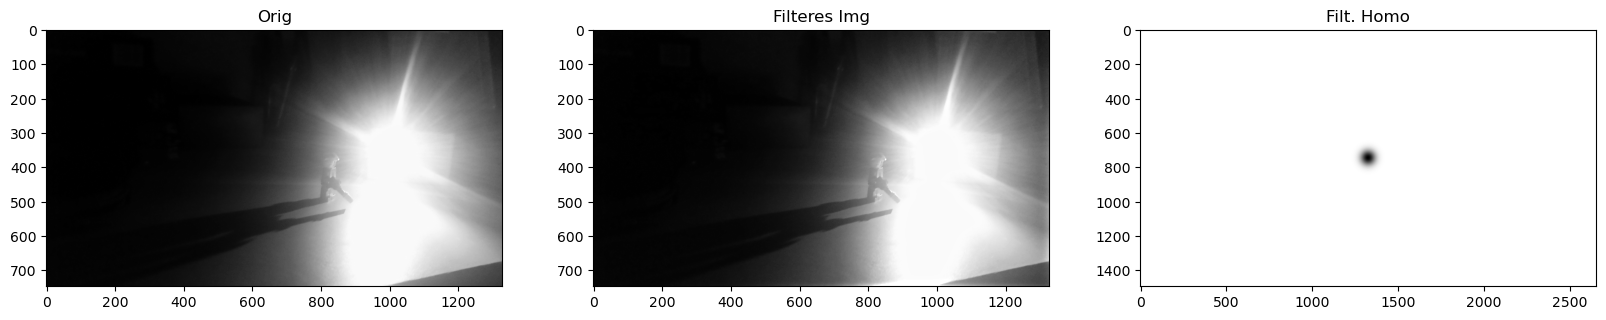

In [16]:
G_homo = F_shift*H_homo
im_homo_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_homo))) 
im_homo = im_homo_fill[0:im.shape[0],0:im.shape[1]] 

im_homo = np.exp(im_homo)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 20)) 
axs[0].imshow(im1,cmap='gray',vmin=0,vmax=255) 
axs[2].imshow(H_homo,cmap='gray')
axs[1].imshow(im_homo,cmap='gray',vmin=0,vmax=255) 
axs[0].set_title('Orig') 
axs[2].set_title('Filt. Homo') 
axs[1].set_title('Filteres Img')

#Question 5: Add a periodic noise in the image Fig7.01.jpg (do it in the frequency domain). Then, use notch filter to remove the noise.

Text(0.5, 1.0, 'Com ruído')

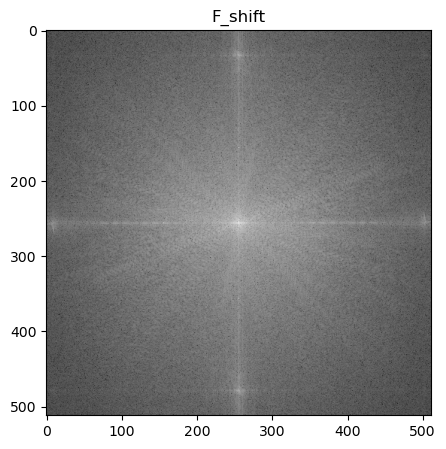

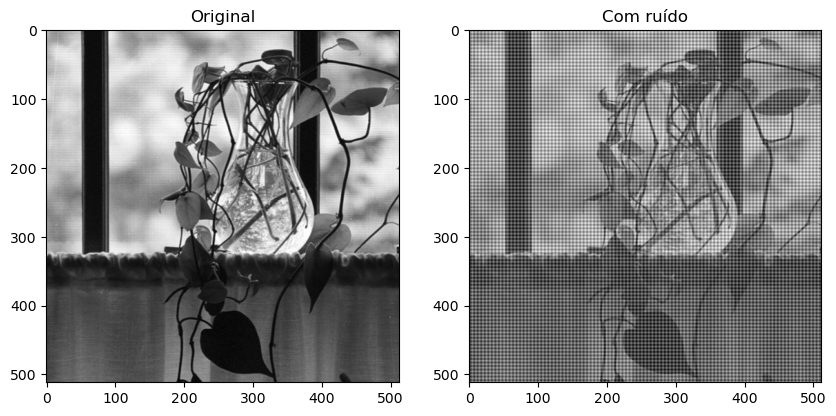

In [17]:
#Para adicionar o ruído 
im3 = skimage.io.imread(list_path+'Fig7.01.jpg') 
F_shift = np.fft.fftshift(np.fft.fft2(im3)) 
max_F = np.max(F_shift.ravel()) 
center = [int(np.round(im3.shape[0]/2)),int(np.round(im3.shape[1]/2))] 

pontos = [(100, 0), (0, 100)] 
for i in range(len(pontos)): 
  F_shift[center[0]-pontos[i][0],center[1]-pontos[i][1]] = 0.2*max_F - 0.2j*max_F 
  F_shift[center[0]+pontos[i][0],center[1]+pontos[i][1]] = 0.2*max_F + 0.2j*max_F 

plt.figure(figsize = (5,5)) 
plt.imshow(np.log(np.abs(F_shift)+1),cmap='gray')
plt.title('F_shift');

vim_3 = np.real(np.fft.ifft2(np.fft.fftshift(F_shift))) 

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 
axs[0].imshow(im3,cmap='gray') 
axs[1].imshow(vim_3,cmap='gray') 
axs[0].set_title('Original') 
axs[1].set_title('Com ruído')

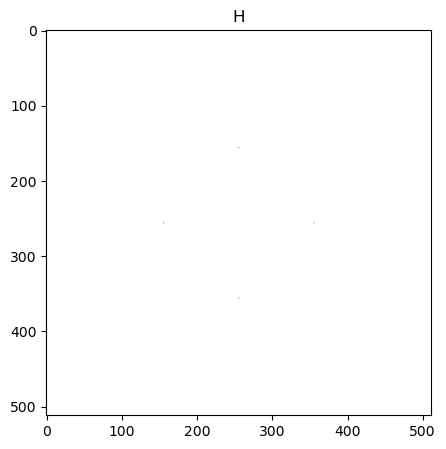

In [18]:
H = np.zeros(F_shift.shape)+255

pontos = [(100, 0), (0, 100)] 
for i in range(len(pontos)):
  H[center[0]-pontos[i][0],center[1]-pontos[i][1]] = 0
  H[center[0]+pontos[i][0],center[1]+pontos[i][1]] = 0

plt.figure(figsize = (5,5)) 
plt.imshow(H,cmap='gray')
plt.title('H');

Text(0.5, 1.0, 'Filtrada')

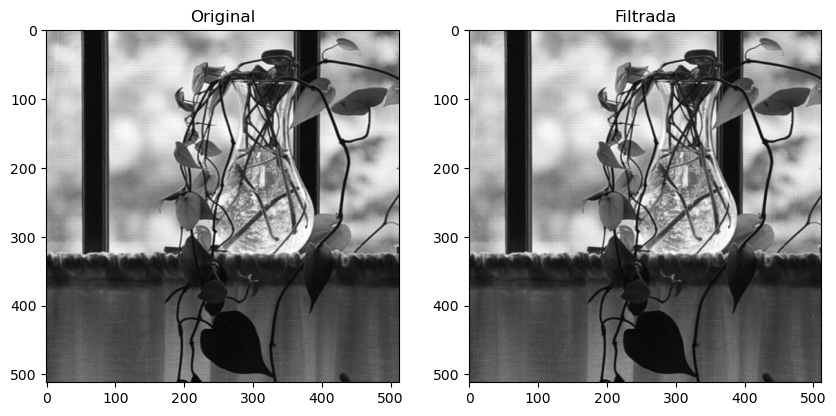

In [19]:
G = F_shift*H

im_3_f = np.real(np.fft.ifft2(np.fft.fftshift(G))) 

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) 
axs[0].imshow(im3,cmap='gray') 
axs[1].imshow(im_3_f,cmap='gray') 
axs[0].set_title('Original') 
axs[1].set_title('Filtrada')